# Exercise 2  Bengaluru House Prices Data Set Data Preprocessing and Visualization
### Abeer Sethia | 220968144 | Batch B1 | Week 2 | Exercise 2
Using the given BENGALURU HOUSE PRICES DATASET, perform data preprocessing and answer the following questions.
Find the missing values in the DataFrame and replace them with the right missing values. However, if a column has more than 15% missing values then drop (or remove) the column from the DataFrame except for the location, size and total_sqft columns because the house prices are directly dependent on these three crucial parameters. In fact, the rate of a house is reported as a cost per unit area of the house.
Drop (or remove) the rows containing the missing values in the location, size, and total_sqft columns. Additionally, drop any row which contains nonsensical values in the context of houses.
1. Compute the total number of missing values in the DataFrame.
2. Compute the percentage of missing values in the DataFrame. If a column has more
than 15% missing values then drop (or remove) the column from the DataFrame.
3. Which column has the most number of missing values?
4. drop (or remove) the rows containing the missing values in the location, size, and
total_sqft columns
5. drop all the rows in the bath column containing more than 5 bathrooms.
6. Find the houses available in each area.
7. Find the top five areas where the large number of houses available
8. Visualize the house price based on build up area of top five locations where the large
number of houses available (Visualize by independent charts.)

### Importing the libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import percentile
from numpy.random import rand

### Importing and printing the dataset

In [19]:
df=pd.read_csv("Bengaluru_House_Prices.csv")

In [20]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [21]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### 1. Compute the total number of missing values in the DataFrame

In [22]:
print(df.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


### 2. Compute the percentage of missing values in the DataFrame. If a column has more than 15% missing values then drop (or remove) the column from the DataFrame.

In [23]:
percentage=df.isnull().sum()*100/len(df)
print(percentage)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


In [24]:
del df['society']
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


#### Printing out the rows with atleast one missing value

In [25]:
print(df.isnull().sum())

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64


In [26]:
mask = False
for col in df.columns: 
    mask = mask | df[col].isnull()
dfnulls = df[mask]
dfnulls

,area_type,availability,location,size,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,1925,3.0,NaN,125.00
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,1296,2.0,NaN,81.00
...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,Kundalahalli Colony,7 Bedroom,1400,7.0,NaN,218.00
13279,Plot Area,Ready To Move,Vishwanatha Nagenahalli,6 Bedroom,1200,5.0,NaN,130.00
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,1200,5.0,NaN,325.00
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,1675,3.0,NaN,92.13


#### Printing out the column heads with missing values

In [27]:
missing_values = df.isnull()
missing_counts = missing_values.sum()
print(missing_counts[missing_counts > 0].index.tolist())

['location', 'size', 'bath', 'balcony']


### 3. Which column has the most number of missing values?

In [28]:
df.count().idxmin()

'balcony'

### 4. Drop (or remove) the rows containing the missing values in the location, size, and total_sqft columns

In [29]:
df.dropna(subset = ['location', 'size', 'total_sqft'])

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


### 5.Drop all the rows in the bath column containing more than 5 bathrooms.

In [30]:
df.drop(df[df.bath < 6].index)

,area_type,availability,location,size,total_sqft,bath,balcony,price
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,NaN,200.00
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.00
64,Built-up Area,Ready To Move,Bommanahalli,8 Bedroom,3000,8.0,0.0,140.00
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350,7.0,0.0,85.00
...,...,...,...,...,...,...,...,...
13226,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,8 Bedroom,6000,8.0,3.0,215.00
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1020 - 1130,NaN,NaN,52.57
13277,Plot Area,Ready To Move,Kundalahalli Colony,7 Bedroom,1400,7.0,NaN,218.00
13300,Plot Area,Ready To Move,Hosakerehalli,5 Bedroom,1500,6.0,2.0,145.00


### 6. Find the houses available in each area.

In [31]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

### 7. Find the top five areas where the large number of houses available

In [32]:
df['location'].value_counts().head()

Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
Name: location, dtype: int64

### 8. Visualize the house price based on build up area of top five locations where the large number of houses available (Visualize by independent charts.)

<Axes: xlabel='location', ylabel='price'>

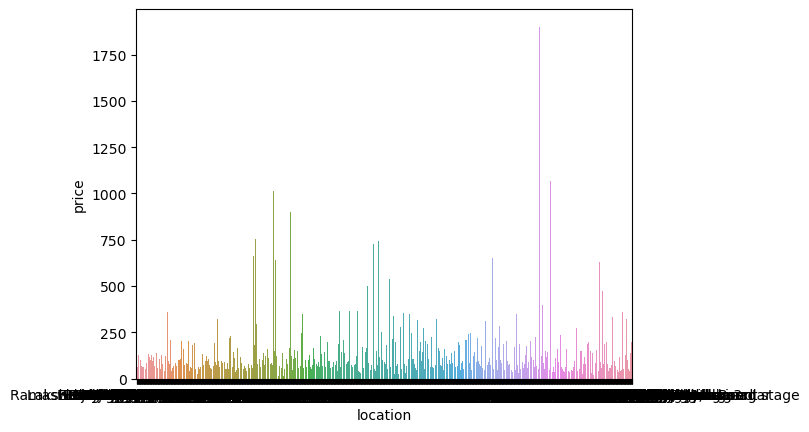

In [33]:
sns.barplot(x='location',y='price',data=df,errorbar=None)